In [7]:
%matplotlib inline

import json
import glob
import re
import itertools
import functools

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats
mpl.rc('font', family='Arial', size=12)

In [2]:
regions = pd.read_csv('regions_speed.bed', sep = '\t', 
                      names = ['chr', 'start', 'end', 'ucsc_name', 'region_type', 'strand'])

In [3]:
for f in glob.glob('genome_correlations/*.cov'):
    if 'drb' in f: continue
    name = re.findall('/([^/]+)\.cov', f)[0]
    df = pd.read_csv(f, sep='\t', names=('chr', 'start', 'end', 'ucsc_name', 'region_type', 'strand' , 'signal'))
    regions[name] = df.signal
    

In [4]:
regions

,chr,start,end,ucsc_name,region_type,strand,cont_1.m,cont_1.p,cont_2.m,cont_2.p
0,chr10,118334320,118334820,chr10:118297929-118342320;-,ns,-,0.000000,3.400000,0.000000,1.916667
1,chr10,118333820,118334320,chr10:118297929-118342320;-,ns,-,0.000000,1.142857,0.000000,2.272727
2,chr10,118333320,118333820,chr10:118297929-118342320;-,ns,-,0.000000,1.200000,0.000000,1.000000
3,chr10,118332820,118333320,chr10:118297929-118342320;-,faster,-,0.000000,1.000000,0.000000,1.500000
4,chr10,118332320,118332820,chr10:118297929-118342320;-,slower,-,0.000000,1.000000,0.000000,1.200000
5,chr10,118331820,118332320,chr10:118297929-118342320;-,slower,-,0.000000,1.000000,0.000000,1.000000
6,chr10,118331320,118331820,chr10:118297929-118342320;-,faster,-,0.000000,1.333333,0.000000,1.000000
7,chr10,118330820,118331320,chr10:118297929-118342320;-,ns,-,0.000000,1.250000,0.000000,1.000000
8,chr10,118330320,118330820,chr10:118297929-118342320;-,ns,-,0.000000,1.750000,0.000000,1.727273
9,chr10,118329820,118330320,chr10:118297929-118342320;-,ns,-,0.000000,1.666667,0.000000,1.222222


In [5]:
regions['mean_sense'] = (regions['cont_1.p'] + regions['cont_2.p'])/2
regions.loc[regions.strand == '-', 'mean_sense'] = (regions.loc[regions.strand == '-', 'cont_1.p'] + regions.loc[regions.strand == '-','cont_2.p'])/2


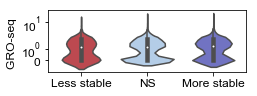

In [17]:
fig, ax = plt.subplots(figsize=(3.73,1.5))
sns.violinplot(
 x = 'region_type',
 y = 'mean_sense',
 data = regions,
 order = ['faster', 'ns', 'slower'],
 palette=['#cf363f','#abcdef', '#6366cf']
)
ax.set_yscale('symlog')
ax.set_ylabel('GRO-seq ')
ax.set_xlabel('')
ax.set_xticklabels(['Less stable', 'NS', 'More stable'])
fig.tight_layout()
fig.savefig('Correlation_to_txn.pdf', transparent=True)

In [26]:
stats.kruskal(regions.loc[regions.region_type == 'slower', 'mean_sense'], 
              regions.loc[regions.region_type == 'ns', 'mean_sense'], 
              regions.loc[regions.region_type == 'faster', 'mean_sense'])

KruskalResult(statistic=13.661564860693858, pvalue=0.0010800127521742916)